In [6]:
%matplotlib inline

import bloscpack as bp
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import os

def get_npz_data(filename):
    filename = filename+'.npz'
    filecontents = np.load(filename)
    data = filecontents['data']
    del filecontents
    return data


def blosc_to_npz(filename):
    file = filename+".bp";

    a = bp.unpack_ndarray_file(file)
    b = np.asarray(a)

    np.savez(filename+'.npz', data=b) # Save matrix as .npz file

    print('Size of bloscpack data:')
    print(np.shape(b))
    print('')

def read_loc_into_array(filename):
    file = open(filename+'.bp', 'r')
    points = []

    for line in file:
        x, y = line.split(' ')
        x = int( x )
        y = int( y.replace('\n','') )
        points.append( [x,y] )
    return points

def change_plot_sizes( width=8, length=6):
    # Get current size
    fig_size = plt.rcParams["figure.figsize"]

    # Prints: [8.0, 6.0]
    print "Current size:", fig_size

    # Set figure width to 12 and height to 9
    fig_size[0] = width
    fig_size[1] = length
    plt.rcParams["figure.figsize"] = fig_size

# Built-in functions

In [ ]:
features_fp = DataManager.get_dnn_features_filepath_v2(stack=stack, sec=sec, fn=fn, prep_id=prep_id, win_id=win_id,
                                    normalization_scheme=normalization_scheme,
                                    model_name=model_name, what='features')

In [ ]:
roi_xmin = 0
roi_ymin = 0
roi_w, roi_h = metadata_cache['image_shape'][stack] # prep2 raw image dimensions

In [ ]:
mask_tb = DataManager.load_thumbnail_mask_v3(stack=stack, prep_id=prep_id, fn=fn)
grid_spec = win_id_to_gridspec(win_id=win_id, stack=stack)
locations_roi = locate_patches_v2(grid_spec=grid_spec, mask_tb=mask_tb,
                                    bbox_lossless=(roi_xmin, roi_ymin, roi_w, roi_h),
                                    return_locations=True)

In [ ]:
features, locations = DataManager.load_dnn_features_v2(stack=stack, sec=sec, fn=fn,
                                                                       prep_id=prep_id, win_id=win_id,
                                                                       normalization_scheme=scheme,
                                                                       model_name=model_name)
locations_to_compute = list(set(map(tuple, locations_roi)) - set(map(tuple, locations)))

In [ ]:
features_newly_computed = compute_features_at_one_section_locations(scheme=scheme, win_id=win_id,
                                        stack=stack, section=sec, locations=locations_to_compute,
                                        model=model, mean_img=mean_img, batch_size=batch_size, method=method,
                                        version=version)

In [ ]:
DataManager.save_dnn_features_v2(features=features, locations=locations_roi,
                                    stack=stack, sec=sec, fn=fn, prep_id=prep_id,
                                    win_id=win_id, normalization_scheme=scheme,
                                    model_name=model_name,
                                    timestamp='now' if attach_timestamp else None)

# Patch Features: locations and features

In [8]:
fp_root = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/'
fn_locations = fp_root+'/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/\
UCSD001_slide052_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations'
fn_features = fp_root+'/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/\
UCSD001_slide052_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features'

# Location Data
locations = read_loc_into_array( fn_locations )
# Feature Data
#blosc_to_npz( fn_features )
features = get_npz_data( fn_features )

print np.shape( locations )
print np.shape( features )

(52583, 2)
(52583, 1024)


In [9]:
# Row number is the grid point index
# The two values are x and y pixel coordinates
locations

[[250, 250],
 [250, 342],
 [250, 434],
 [250, 526],
 [250, 618],
 [250, 710],
 [250, 802],
 [250, 894],
 [250, 986],
 [250, 1078],
 [250, 1170],
 [250, 1262],
 [250, 1354],
 [250, 1446],
 [250, 1538],
 [250, 1630],
 [250, 1722],
 [250, 1814],
 [250, 1906],
 [250, 1998],
 [250, 2090],
 [250, 2182],
 [250, 2274],
 [250, 2366],
 [250, 2458],
 [250, 2550],
 [250, 2642],
 [250, 2734],
 [250, 2826],
 [250, 2918],
 [250, 3010],
 [250, 3102],
 [250, 3194],
 [250, 3286],
 [250, 3378],
 [250, 3470],
 [250, 3562],
 [250, 3654],
 [250, 3746],
 [250, 3838],
 [250, 3930],
 [250, 4022],
 [250, 4114],
 [250, 4206],
 [250, 4298],
 [250, 4390],
 [250, 4482],
 [250, 4574],
 [250, 4666],
 [250, 4758],
 [250, 4850],
 [250, 4942],
 [250, 5034],
 [250, 5126],
 [250, 5218],
 [250, 5310],
 [250, 5402],
 [250, 5494],
 [250, 5586],
 [250, 5678],
 [250, 5770],
 [250, 5862],
 [250, 5954],
 [250, 6046],
 [250, 6138],
 [250, 6230],
 [250, 6322],
 [250, 6414],
 [250, 6506],
 [250, 6598],
 [250, 6690],
 [250, 6782],
 

('Datapoints: ', 52583)


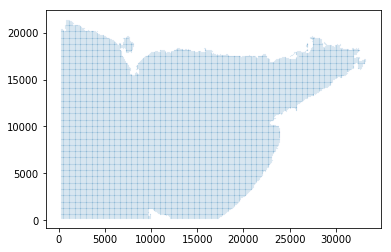

In [11]:
X = []
Y = []
for i in range( 0 , np.shape(locations)[0]):
    X.append(locations[i][0])
    Y.append(locations[i][1])

print('Datapoints: ',len(X))
plt.scatter(X,Y,s=.01,marker=".")
plt.show()

In [12]:
del features
del locations
del X
del Y